In [1]:
# dataset: wisc_bc_data.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wisc_bc_data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# separate in and out 

x = df.drop(['id', 'diagnosis'], axis = 1)

y = df['diagnosis']

#### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

#### cross validation

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

### Build the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [13]:
y_pred = knn.predict(x_test)

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

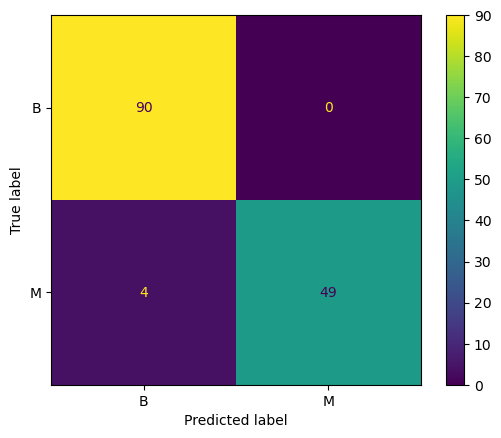

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [17]:
accuracy_score(y_test, y_pred)

0.972027972027972

### GridSearchCV

In [18]:
# define the parameter grid

params = {
    'n_neighbors': [5,7,10,12,13,15,20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute']
}

In [19]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(estimator= KNeighborsClassifier(),
                   param_grid= params,
                   scoring= 'accuracy',
                   cv = 5)

In [23]:
grid.fit(x_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 12, 13, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
y_pred = grid.predict(x_test)

In [25]:
accuracy_score(y_test, y_pred)

1.0

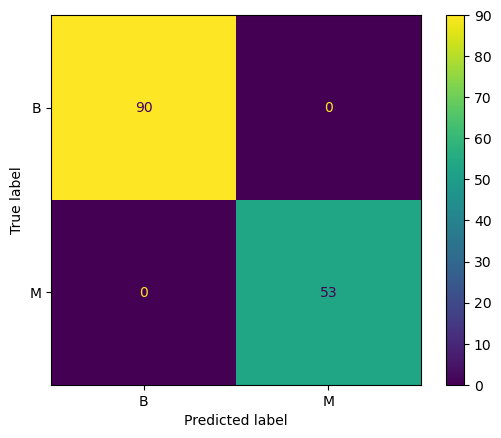

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [27]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')